In [1469]:
import polars as pl
import statsmodels.api as sm
df=pl.read_csv("/home/don/Desktop/multiple_regression/01_Multiple_regression/data/ames-housing-dataset/AmesHousing.csv")

pl.Config.set_tbl_rows(10)  
pl.Config.set_tbl_cols(300) 

df

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
i64,i64,i64,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,i64,str,str,str,str,str,str,str,i64,str,i64,i64,i64,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,i64,str,str,i64,str,i64,i64,str,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,str,str,i64
1,526301100,20,"""RL""",141,31770,"""Pave""","""NA""","""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,5,1960,1960,"""Hip""","""CompShg""","""BrkFace""","""Plywood""","""Stone""",112,"""TA""","""TA""","""CBlock""","""TA""","""Gd""","""Gd""","""BLQ""",639,"""Unf""",0,441,1080,"""GasA""","""Fa""","""Y""","""SBrkr""",1656,0,0,1656,1,0,1,0,3,1,"""TA""",7,"""Typ""",2,"""Gd""","""Attchd""",1960,"""Fin""",2,528,"""TA""","""TA""","""P""",210,62,0,0,0,0,"""NA""","""NA""","""NA""",0,5,2010,"""WD ""","""Normal""",215000
2,526350040,20,"""RH""",80,11622,"""Pave""","""NA""","""Reg""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""NAmes""","""Feedr""","""Norm""","""1Fam""","""1Story""",5,6,1961,1961,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""","""None""",0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""Rec""",468,"""LwQ""",144,270,882,"""GasA""","""TA""","""Y""","""SBrkr""",896,0,0,896,0,0,1,0,2,1,"""TA""",5,"""Typ""",0,"""NA""","""Attchd""",1961,"""Unf""",1,730,"""TA""","""TA""","""Y""",140,0,0,0,120,0,"""NA""","""MnPrv""","""NA""",0,6,2010,"""WD ""","""Normal""",105000
3,526351010,20,"""RL""",81,14267,"""Pave""","""NA""","""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,6,1958,1958,"""Hip""","""CompShg""","""Wd Sdng""","""Wd Sdng""","""BrkFace""",108,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",923,"""Unf""",0,406,1329,"""GasA""","""TA""","""Y""","""SBrkr""",1329,0,0,1329,0,0,1,1,3,1,"""Gd""",6,"""Typ""",0,"""NA""","""Attchd""",1958,"""Unf""",1,312,"""TA""","""TA""","""Y""",393,36,0,0,0,0,"""NA""","""NA""","""Gar2""",12500,6,2010,"""WD ""","""Normal""",172000
4,526353030,20,"""RL""",93,11160,"""Pave""","""NA""","""Reg""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",7,5,1968,1968,"""Hip""","""CompShg""","""BrkFace""","""BrkFace""","""None""",0,"""Gd""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",1065,"""Unf""",0,1045,2110,"""GasA""","""Ex""","""Y""","""SBrkr""",2110,0,0,2110,1,0,2,1,3,1,"""Ex""",8,"""Typ""",2,"""TA""","""Attchd""",1968,"""Fin""",2,522,"""TA""","""TA""","""Y""",0,0,0,0,0,0,"""NA""","""NA""","""NA""",0,4,2010,"""WD ""","""Normal""",244000
5,527105010,60,"""RL""",74,13830,"""Pave""","""NA""","""IR1""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""Gilbert""","""Norm""","""Norm""","""1Fam""","""2Story""",5,5,1997,1998,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""","""None""",0,"""TA""","""TA""","""PConc""","""Gd""","""TA""","""No""","""GLQ""",791,"""Unf""",0,137,928,"""GasA""","""Gd""","""Y""","""SBrkr""",928,701,0

In [1470]:
TARGET='SalePrice'
df.null_count()

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,23,0,0,0,1,1,4,1,1,2,1,1,1,0,0,0,1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,159,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1471]:
df = df.with_columns(pl.col('Lot Frontage').fill_null(pl.col('Lot Frontage').median()))
df = df.with_columns(pl.col('Garage Yr Blt').fill_null(pl.col('Garage Yr Blt').median()))

In [1472]:
df = df.drop_nulls()
df.null_count()

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1473]:
df_pandas=pl.DataFrame.to_pandas(df)
df_pandas

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,2926,923275080,80,RL,37.0,7937,Pave,NA,IR1,Lvl,...,0,NA,GdPrv,NA,0,3,2006,WD,Normal,142500
2894,2927,923276100,20,RL,68.0,8885,Pave,NA,IR1,Low,...,0,NA,MnPrv,NA,0,6,2006,WD,Normal,131000
2895,2928,923400125,85,RL,62.0,10441,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,132000
2896,2929,924100070,20,RL,77.0,10010,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2006,WD,Normal,170000


In [1474]:
import seaborn as sns
df_pandas=pl.DataFrame.to_pandas(df)


In [1475]:
df=df.drop(['PID','Order'])
df = df.with_row_index('index')
df

index,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
u32,i64,str,f64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,i64,str,str,str,str,str,str,str,i64,str,i64,i64,i64,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,i64,str,str,f64,str,i64,i64,str,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,str,str,i64
0,20,"""RL""",141.0,31770,"""Pave""","""NA""","""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,5,1960,1960,"""Hip""","""CompShg""","""BrkFace""","""Plywood""","""Stone""",112,"""TA""","""TA""","""CBlock""","""TA""","""Gd""","""Gd""","""BLQ""",639,"""Unf""",0,441,1080,"""GasA""","""Fa""","""Y""","""SBrkr""",1656,0,0,1656,1,0,1,0,3,1,"""TA""",7,"""Typ""",2,"""Gd""","""Attchd""",1960.0,"""Fin""",2,528,"""TA""","""TA""","""P""",210,62,0,0,0,0,"""NA""","""NA""","""NA""",0,5,2010,"""WD ""","""Normal""",215000
1,20,"""RH""",80.0,11622,"""Pave""","""NA""","""Reg""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""NAmes""","""Feedr""","""Norm""","""1Fam""","""1Story""",5,6,1961,1961,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""","""None""",0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""Rec""",468,"""LwQ""",144,270,882,"""GasA""","""TA""","""Y""","""SBrkr""",896,0,0,896,0,0,1,0,2,1,"""TA""",5,"""Typ""",0,"""NA""","""Attchd""",1961.0,"""Unf""",1,730,"""TA""","""TA""","""Y""",140,0,0,0,120,0,"""NA""","""MnPrv""","""NA""",0,6,2010,"""WD ""","""Normal""",105000
2,20,"""RL""",81.0,14267,"""Pave""","""NA""","""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,6,1958,1958,"""Hip""","""CompShg""","""Wd Sdng""","""Wd Sdng""","""BrkFace""",108,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",923,"""Unf""",0,406,1329,"""GasA""","""TA""","""Y""","""SBrkr""",1329,0,0,1329,0,0,1,1,3,1,"""Gd""",6,"""Typ""",0,"""NA""","""Attchd""",1958.0,"""Unf""",1,312,"""TA""","""TA""","""Y""",393,36,0,0,0,0,"""NA""","""NA""","""Gar2""",12500,6,2010,"""WD ""","""Normal""",172000
3,20,"""RL""",93.0,11160,"""Pave""","""NA""","""Reg""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",7,5,1968,1968,"""Hip""","""CompShg""","""BrkFace""","""BrkFace""","""None""",0,"""Gd""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",1065,"""Unf""",0,1045,2110,"""GasA""","""Ex""","""Y""","""SBrkr""",2110,0,0,2110,1,0,2,1,3,1,"""Ex""",8,"""Typ""",2,"""TA""","""Attchd""",1968.0,"""Fin""",2,522,"""TA""","""TA""","""Y""",0,0,0,0,0,0,"""NA""","""NA""","""NA""",0,4,2010,"""WD ""","""Normal""",244000
4,60,"""RL""",74.0,13830,"""Pave""","""NA""","""IR1""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""Gilbert""","""Norm""","""Norm""","""1Fam""","""2Story""",5,5,1997,1998,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""","""None""",0,"""TA""","""TA""","""PConc""","""Gd""","""TA""","""No""","""GLQ""",791,"""Unf""",0,137,928,"""GasA""","""Gd""","""Y""","""SBrkr""",928,701,0,1629,0,0,2,1,3,1,"""TA""",6,"""Typ""",1

In [1476]:
df_dummies=df.select(~pl.selectors.by_dtype(pl.NUMERIC_DTYPES))
columns_to_drop=df_dummies.columns
df_dummies


/tmp/ipykernel_201828/1093800265.py:1: DeprecationWarning: `NUMERIC_DTYPES` is deprecated. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_dummies=df.select(~pl.selectors.by_dtype(pl.NUMERIC_DTYPES))


MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""RL""","""Pave""","""NA""","""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""","""Hip""","""CompShg""","""BrkFace""","""Plywood""","""Stone""","""TA""","""TA""","""CBlock""","""TA""","""Gd""","""Gd""","""BLQ""","""Unf""","""GasA""","""Fa""","""Y""","""SBrkr""","""TA""","""Typ""","""Gd""","""Attchd""","""Fin""","""TA""","""TA""","""P""","""NA""","""NA""","""NA""","""WD ""","""Normal"""
"""RH""","""Pave""","""NA""","""Reg""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""NAmes""","""Feedr""","""Norm""","""1Fam""","""1Story""","""Gable""","""CompShg""","""VinylSd""","""VinylSd""","""None""","""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""Rec""","""LwQ""","""GasA""","""TA""","""Y""","""SBrkr""","""TA""","""Typ""","""NA""","""Attchd""","""Unf""","""TA""","""TA""","""Y""","""NA""","""MnPrv""","""NA""","""WD ""","""Normal"""
"""RL""","""Pave""","""NA""","""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""","""Hip""","""CompShg""","""Wd Sdng""","""Wd Sdng""","""BrkFace""","""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""","""Unf""","""GasA""","""TA""","""Y""","""SBrkr""","""Gd""","""Typ""","""NA""","""Attchd""","""Unf""","""TA""","""TA""","""Y""","""NA""","""NA""","""Gar2""","""WD ""","""Normal"""
"""RL""","""Pave""","""NA""","""Reg""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""","""Hip""","""CompShg""","""BrkFace""","""BrkFace""","""None""","""Gd""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""","""Unf""","""GasA""","""Ex""","""Y""","""SBrkr""","""Ex""","""Typ""","""TA""","""Attchd""","""Fin""","""TA""","""TA""","""Y""","""NA""","""NA""","""NA""","""WD ""","""Normal"""
"""RL""","""Pave""","""NA""","""IR1""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""Gilbert""","""Norm""","""Norm""","""1Fam""","""2Story""","""Gable""","""CompShg""","""VinylSd""","""VinylSd""","""None""","""TA""","""TA""","""PConc""","""Gd""","""TA""","""No""","""GLQ""","""Unf""","""GasA""","""Gd""","""Y""","""SBrkr""","""TA""","""Typ""","""TA""","""Attchd""","""Fin""","""TA""","""TA""","""Y""","""NA""","""MnPrv""","""NA""","""WD ""","""Normal"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""RL""","""Pave""","""NA""","""IR1""","""Lvl""","""AllPub""","""CulDSac""","""Gtl""","""Mitchel""","""Norm""","""Norm""","""1Fam""","""SLvl""","""Gable""","""CompShg""","""HdBoard""","""HdBoard""","""None""","""TA""","""TA""","""CBlock""","""TA""","""TA""","""Av""","""GLQ""","""Unf""","""GasA""","""TA""","""Y""","""SBrkr""","""TA""","""Typ""","""NA""","""Detchd""","""Unf""","""TA""","""TA""","""Y""","""NA""","""GdPrv""","""NA""","""WD ""","""Normal"""
"""RL""","""Pave""","""NA""","""IR1""","""Low""","""AllPub""","""Inside""","""Mod""","""Mitchel""","""Norm""","""Norm""","""1Fam""","""1Story""","""Gable""","""CompShg""","""HdBoard""","""HdBoard""","""None""","""TA""","""TA""","""CBlock""","""Gd""","""TA""","""Av""","""BLQ""","""ALQ""","""GasA""","""TA""","""Y""","""SBrkr""","""TA""","""Typ""","""NA""","""Attchd""","""Unf""","""TA""","""TA""","""Y""","""NA""","""MnPrv""","""NA""","""WD ""","""Normal"""
"""RL""","""Pave""","""NA""","""Reg""","""Lvl""","""AllPub""","""In

In [1477]:
len(columns_to_drop)

43

In [1478]:
df_dummies=pl.DataFrame.to_dummies(df_dummies,drop_first=True)
df_dummies = df_dummies.with_row_index('index')
df_dummies

index,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_NA,Bsmt Qual_Po,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_NA,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Mn,Bsmt Exposure_NA,Bsmt Exposure_No,BsmtFin Type 1_ALQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_NA,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_NA,BsmtFin Type 2_Rec,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_NA,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_NA,Garage Qual_Po,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_NA,Garage Cond_Po,Paved Drive_N,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Typ

In [1479]:
[i for i in df_dummies.columns if "Electrical" in i]

['Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix']

In [1480]:
df['Electrical'].unique()

Electrical
str
"""FuseA"""
"""Mix"""
"""FuseF"""
"""SBrkr"""
"""FuseP"""


In [1481]:
df=df.drop(columns_to_drop)
df=df.join(df_dummies,on='index')


<AxesSubplot: >

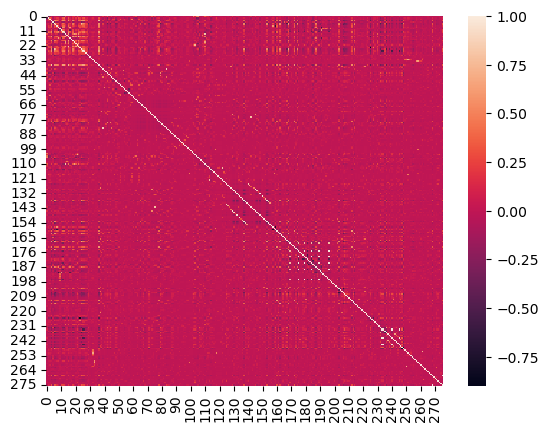

In [1482]:
df=df.drop('index')
sns.heatmap(df.corr())

In [1483]:
corr_target=df.corr().select(TARGET)

In [1484]:
cols_corr=df.corr().columns
df.corr().columns

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'MS Zoning_A (agr)',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RM',
 'Street_Grvl',
 'Alley_Grvl',
 'Alley_Pave',
 'Lot Shape_IR2',
 'Lot Shape_IR3',
 'Lot Shape_Reg',
 'Land Contour_Bnk',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Utilities_NoSeWa',
 'Utilities_NoSewr',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'Lot Config_Ins

In [1485]:
df_corr=pl.DataFrame({"Name":cols_corr,
                     "corr":corr_target})
df_corr.sort(by='corr')

Name,corr
str,f64
"""Fireplace Qu_NA""",-0.480839
"""Garage Finish_Unf""",-0.422161
"""Mas Vnr Type_None""",-0.402002
"""Garage Type_Detchd""",-0.363444
"""Heating QC_TA""",-0.338118
…,…
"""Garage Area""",0.638955
"""Garage Cars""",0.646805
"""Gr Liv Area""",0.708564


In [1486]:
df_corr_03=df_corr.filter((pl.col('corr') > 0.3) | (pl.col('corr') < -0.3))

In [1487]:
high_corr_vars=df_corr_03.select('Name').to_numpy()
high_corr=df_corr_03.to_pandas()
high_corr_names=high_corr['Name'].to_numpy()
high_corr_names

array(['Lot Frontage', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'SalePrice', 'Lot Shape_Reg',
       'Neighborhood_NridgHt', 'Exterior 1st_VinylSd',
       'Exterior 2nd_VinylSd', 'Mas Vnr Type_None', 'Exter Qual_Ex',
       'Exter Qual_Gd', 'Foundation_PConc', 'Bsmt Qual_Ex',
       'BsmtFin Type 1_GLQ', 'Heating QC_Ex', 'Heating QC_TA',
       'Kitchen Qual_Ex', 'Kitchen Qual_Gd', 'Fireplace Qu_NA',
       'Garage Type_Detchd', 'Garage Finish_Unf', 'Sale Type_New',
       'Sale Condition_Partial'], dtype=object)

In [1488]:
df_high_corr=df.select(high_corr_names)

In [1489]:
X=df_high_corr.drop(TARGET)
y=df_high_corr.select(TARGET)

<AxesSubplot: >

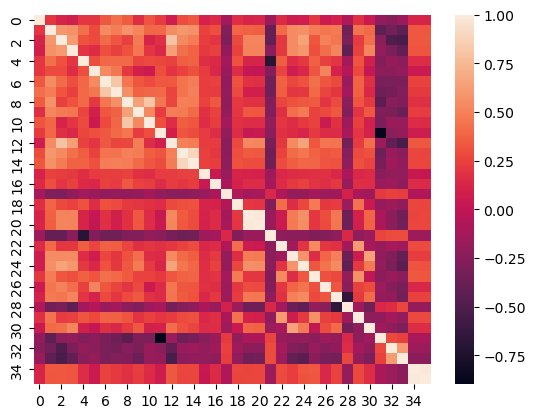

In [1490]:
sns.heatmap(X.corr())

In [1491]:
# Subset the DataFrame to include only the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
X=X.to_pandas()
# Calculate VIF for each variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif_data.sort_values(by='VIF',ascending=True))

                  Variable           VIF
18    Neighborhood_NridgHt      1.592567
16           Open Porch SF      1.802188
15            Wood Deck SF      1.829024
25            Bsmt Qual_Ex      2.159712
22           Exter Qual_Ex      2.448869
29         Kitchen Qual_Ex      2.603189
32      Garage Type_Detchd      2.652495
28           Heating QC_TA      2.657732
26      BsmtFin Type 1_GLQ      2.745203
17           Lot Shape_Reg      3.170970
4             Mas Vnr Area      3.193208
33       Garage Finish_Unf      3.494962
30         Kitchen Qual_Gd      3.900606
5             BsmtFin SF 1      4.180696
23           Exter Qual_Gd      4.418500
24        Foundation_PConc      4.488704
27           Heating QC_Ex      4.629090
21       Mas Vnr Type_None      5.678873
11              Fireplaces     10.827770
31         Fireplace Qu_NA     11.123971
0             Lot Frontage     16.099083
9                Full Bath     20.038867
6            Total Bsmt SF     26.140968
14             G

In [1492]:
vif_10=vif_data[vif_data['VIF']<12]

In [1493]:
vif_reduced_names=vif_10['Variable']
vif_reduced_names.to_numpy()

array(['Mas Vnr Area', 'BsmtFin SF 1', 'Fireplaces', 'Wood Deck SF',
       'Open Porch SF', 'Lot Shape_Reg', 'Neighborhood_NridgHt',
       'Mas Vnr Type_None', 'Exter Qual_Ex', 'Exter Qual_Gd',
       'Foundation_PConc', 'Bsmt Qual_Ex', 'BsmtFin Type 1_GLQ',
       'Heating QC_Ex', 'Heating QC_TA', 'Kitchen Qual_Ex',
       'Kitchen Qual_Gd', 'Fireplace Qu_NA', 'Garage Type_Detchd',
       'Garage Finish_Unf'], dtype=object)

In [1494]:
df_high_corr_vif=df.select(vif_reduced_names)
df_high_corr_vif

Mas Vnr Area,BsmtFin SF 1,Fireplaces,Wood Deck SF,Open Porch SF,Lot Shape_Reg,Neighborhood_NridgHt,Mas Vnr Type_None,Exter Qual_Ex,Exter Qual_Gd,Foundation_PConc,Bsmt Qual_Ex,BsmtFin Type 1_GLQ,Heating QC_Ex,Heating QC_TA,Kitchen Qual_Ex,Kitchen Qual_Gd,Fireplace Qu_NA,Garage Type_Detchd,Garage Finish_Unf
i64,i64,i64,i64,i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
112,639,2,210,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,468,0,140,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1
108,923,0,393,36,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
0,1065,2,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0
0,791,1,212,34,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,819,0,120,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1
0,301,0,164,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
0,337,0,80,32,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0


In [1495]:
X=df_high_corr_vif
X=X.to_pandas()


In [1496]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model=LinearRegression()

print(cross_val_score(model,X,y).mean())



0.7330244376107543


In [1497]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

model.fit(X_train,y_train)
r2=model.score(X_test,y_test)

In [1498]:
n = X.shape[0]  # Number of observations
p = X.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

Adjusted R-squared: 0.7665


In [1499]:
model.fit(X,y)

LinearRegression()

In [1500]:
import joblib

joblib.dump(model,'LinReg_FD.pkl')

['LinReg_FD.pkl']

In [1501]:
model2=joblib.load('LinReg_FD.pkl')
model2.score(X_test,y_test)

0.7766381280165804